In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [3]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

In [4]:
print("İlk 5 Satır:\n", df.head())

İlk 5 Satır:
    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \


In [5]:
print("\nVeri Seti Bilgileri:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
print("\nBetimsel İstatistikler:\n", df.describe().T)


Betimsel İstatistikler:
                          count        mean         std         min  \
mean radius              569.0   14.127292    3.524049    6.981000   
mean texture             569.0   19.289649    4.301036    9.710000   
mean perimeter           569.0   91.969033   24.298981   43.790000   
mean area                569.0  654.889104  351.914129  143.500000   
mean smoothness          569.0    0.096360    0.014064    0.052630   
mean compactness         569.0    0.104341    0.052813    0.019380   
mean concavity           569.0    0.088799    0.079720    0.000000   
mean concave points      569.0    0.048919    0.038803    0.000000   
mean symmetry            569.0    0.181162    0.027414    0.106000   
mean fractal dimension   569.0    0.062798    0.007060    0.049960   
radius error             569.0    0.405172    0.277313    0.111500   
texture error            569.0    1.216853    0.551648    0.360200   
perimeter error          569.0    2.866059    2.021855    0.7570

In [7]:
print("\nHedef Değişken Dağılımı:\n", df['target'].value_counts())


Hedef Değişken Dağılımı:
 target
1    357
0    212
Name: count, dtype: int64


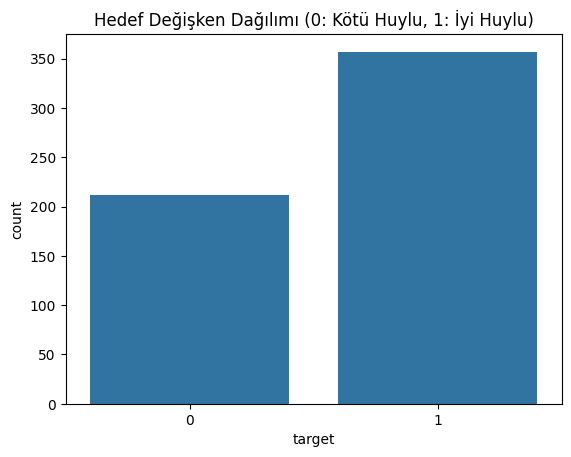

In [8]:
sns.countplot(x='target', data=df)
plt.title('Hedef Değişken Dağılımı (0: Kötü Huylu, 1: İyi Huylu)')
plt.show()

In [9]:
print("\nEksik Değer Sayısı:\n", df.isnull().sum())


Eksik Değer Sayısı:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [10]:
print("\nTekrarlanan Satır Sayısı:", df.duplicated().sum())


Tekrarlanan Satır Sayısı: 0


In [11]:
# Düşük varyans belirleme 
low_variance_cols = []
variance_threshold = 0.001 # Çok düşük bir eşik değer
# Düşük varyans = çok düşük değişim, demek ki tüm veri setinde neredeyse aynı öyleyse tahmin için ihtiyacımız olmayabilir
for col in df.columns[:-1]: # Hedef değişken hariç tutma
    if df[col].var() < variance_threshold:
        low_variance_cols.append(col)

shape_before_removing = df.shape
print("\nEski Veri Setinin Boyutu:", df.shape)
df = df.drop(columns=low_variance_cols) # Bu sütunları (özellikleri) verisetinden çıkarma 
print(f"\nVaryansı {variance_threshold}'dan düşük olan sütunlar çıkarıldı: {low_variance_cols}")

print("\nGüncellenmiş Veri Setinin Boyutu (Varyans Düşük Sütunlar Çıkarıldıktan Sonra):", df.shape)


Varyansı 0.001'dan düşük olan sütunlar çıkarıldı: ['mean smoothness', 'mean symmetry', 'mean fractal dimension', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst smoothness', 'worst fractal dimension']

Eski Veri Setinin Boyutu: (569, 20)

Güncellenmiş Veri Setinin Boyutu (Varyans Düşük Sütunlar Çıkarıldıktan Sonra): (569, 20)



Korelasyonu 0.8'dan yüksek olan sütunlar çıkarıldı: {'worst concavity', 'mean concavity', 'worst compactness', 'mean area', 'perimeter error', 'worst radius', 'worst texture', 'area error', 'worst concave points', 'worst perimeter', 'mean perimeter', 'worst area', 'mean concave points'}

Güncellenmiş Veri Setinin Boyutu (Yüksek Korelasyonlu Sütunlar Çıkarıldıktan Sonra): (569, 7)

İşlenmiş Veri Setinin İlk 5 Satırı:
    mean radius  mean texture  mean compactness  radius error  texture error  \
0        17.99         10.38           0.27760        1.0950         0.9053   
1        20.57         17.77           0.07864        0.5435         0.7339   
2        19.69         21.25           0.15990        0.7456         0.7869   
3        11.42         20.38           0.28390        0.4956         1.1560   
4        20.29         14.34           0.13280        0.7572         0.7813   

   worst symmetry  target  
0          0.4601       0  
1          0.2750       0  
2          0.3613  

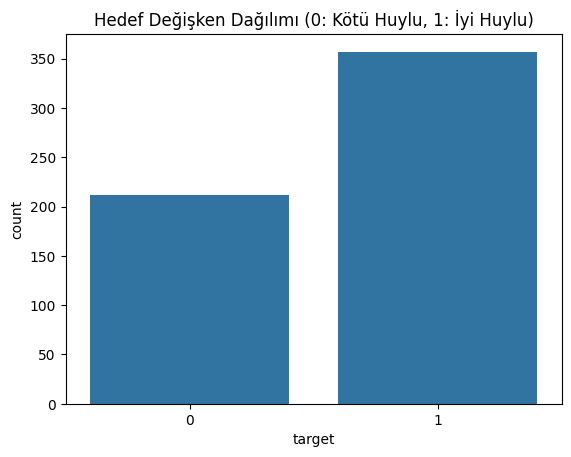

In [12]:
# Korelasyon matrisini hesaplayalım (mutlak değerini alıyoruz)
correlation_matrix = df.corr().abs()

# Üst üçgeni alalım (tekrar eden çiftleri önlemek için)
upper_triangle = np.triu(correlation_matrix, k=1)

# Yüksek korelasyonlu sütun çiftlerini bulalım ve saklayalım
cols_to_drop = set()
correlation_threshold = 0.8

for i in range(upper_triangle.shape[0]):
    for j in range(upper_triangle.shape[1]):
        if upper_triangle[i, j] > correlation_threshold:
            col_name = correlation_matrix.columns[j]
            cols_to_drop.add(col_name)

# Hedef değişkenini çıkarmayalım
if 'target' in cols_to_drop:
    cols_to_drop.remove('target')

# Yüksek korelasyonlu sütunları veri çerçevesinden çıkaralım
df = df.drop(columns=cols_to_drop)
print(f"\nKorelasyonu {correlation_threshold}'dan yüksek olan sütunlar çıkarıldı: {cols_to_drop}")
print("\nGüncellenmiş Veri Setinin Boyutu (Yüksek Korelasyonlu Sütunlar Çıkarıldıktan Sonra):", df.shape)

# Veri setinin son halini inceleyelim
print("\nİşlenmiş Veri Setinin İlk 5 Satırı:\n", df.head())
print("\nİşlenmiş Veri Seti Bilgileri:\n", df.info())

# Hedef değişken dağılımını kontrol edelim
print("\nHedef Değişken Dağılımı (Son Hali):\n", df['target'].value_counts())
sns.countplot(x='target', data=df)
plt.title('Hedef Değişken Dağılımı (0: Kötü Huylu, 1: İyi Huylu)')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

# Özellikler (X) ve hedef değişken (y)
X = df.drop('target', axis=1) # 'target' sütunu hariç tüm sütunlar özelliklerdir
y = df['target'] # 'target' sütunu hedef değişkendir

# Veri setini eğitim ve test kümelerine ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# train_test_split: veriyi eğitim ve test kümelerine ayırma fonksiyonu
# test_size: test kümesinin veri setinin ne kadarını oluşturacağını belirtir (0.3 = %30)
# random_state: rastgele bölme işleminin tekrarlanabilir olması için sabit bir değer
# stratify=y: hedef değişkenin sınıf oranlarının eğitim ve test kümelerinde korunmasını sağlar

print("\nVeri Eğitim ve Test Kümelerine Ayrıldı:")
print("Eğitim Kümesi Boyutu:", X_train.shape)
print("Test Kümesi Boyutu:", X_test.shape)


Veri Eğitim ve Test Kümelerine Ayrıldı:
Eğitim Kümesi Boyutu: (398, 6)
Test Kümesi Boyutu: (171, 6)


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier # KNN algoritmasını ekledik
from sklearn.pipeline import Pipeline

# Veri bölme işleminin daha önce yapıldığını varsayıyoruz:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("\nHiperparametre Ayarlama Başlıyor (Lojistik Regresyon, SVM ve KNN için)...")

# 1. Lojistik Regresyon için Hiperparametre Ayarlama (önceki kod ile aynı)
logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42))
])

logistic_param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear', 'saga']
}

logistic_grid_search = GridSearchCV(logistic_pipeline, logistic_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
logistic_grid_search.fit(X_train, y_train)

best_logistic_model = logistic_grid_search.best_estimator_
best_logistic_auc = logistic_grid_search.best_score_
best_logistic_params = logistic_grid_search.best_params_

print("\n--- Lojistik Regresyon Hiperparametre Ayarlama ---")
print("En İyi Parametreler:", best_logistic_params)
print("En İyi ROC AUC Skoru (Çapraz Doğrulama):", best_logistic_auc)

# 2. SVM için Hiperparametre Ayarlama
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(random_state=42, probability=True))
])

svm_param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': ['scale', 'auto', 0.1, 1],
    'classifier__kernel': ['rbf', 'linear']
}

svm_grid_search = GridSearchCV(svm_pipeline, svm_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
svm_grid_search.fit(X_train, y_train)

best_svm_model = svm_grid_search.best_estimator_
best_svm_auc = svm_grid_search.best_score_
best_svm_params = svm_grid_search.best_params_

print("\n--- Destek Vektör Makineleri (SVM) Hiperparametre Ayarlama ---")
print("En İyi Parametreler:", best_svm_params)
print("En İyi ROC AUC Skoru (Çapraz Doğrulama):", best_svm_auc)

# 3. KNN için Hiperparametre Ayarlama
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier()) # KNN sınıflandırıcısını ekledik
])

knn_param_grid = {
    'classifier__n_neighbors': range(3, 15), # Komşu sayısı (K değeri) için denenecek değerler
    'classifier__weights': ['uniform', 'distance'], # Ağırlıklandırma şeması ('uniform': tüm komşular eşit ağırlıkta, 'distance': uzaklığa göre ağırlıklandırma)
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'] # Komşu arama algoritması
}

knn_grid_search = GridSearchCV(knn_pipeline, knn_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
knn_grid_search.fit(X_train, y_train)

best_knn_model = knn_grid_search.best_estimator_
best_knn_auc = knn_grid_search.best_score_
best_knn_params = knn_grid_search.best_params_

print("\n--- K-En Yakın Komşu (KNN) Hiperparametre Ayarlama ---")
print("En İyi Parametreler:", best_knn_params)
print("En İyi ROC AUC Skoru (Çapraz Doğrulama):", best_knn_auc)

print("\nHiperparametre Ayarlama Tamamlandı (Lojistik Regresyon, SVM ve KNN için).")


Hiperparametre Ayarlama Başlıyor (Lojistik Regresyon, SVM ve KNN için)...

--- Lojistik Regresyon Hiperparametre Ayarlama ---
En İyi Parametreler: {'classifier__C': 100, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
En İyi ROC AUC Skoru (Çapraz Doğrulama): 0.9852137931034483

--- Destek Vektör Makineleri (SVM) Hiperparametre Ayarlama ---
En İyi Parametreler: {'classifier__C': 1, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}
En İyi ROC AUC Skoru (Çapraz Doğrulama): 0.986248275862069

--- K-En Yakın Komşu (KNN) Hiperparametre Ayarlama ---
En İyi Parametreler: {'classifier__algorithm': 'auto', 'classifier__n_neighbors': 13, 'classifier__weights': 'distance'}
En İyi ROC AUC Skoru (Çapraz Doğrulama): 0.977510344827586

Hiperparametre Ayarlama Tamamlandı (Lojistik Regresyon, SVM ve KNN için).



En İyi Modellerin Test Seti Performansı:

--- En İyi Lojistik Regresyon ---
Doğruluk (Accuracy): 0.9240
ROC AUC Skoru: 0.9822

--- En İyi Destek Vektör Makineleri (SVM) ---
Doğruluk (Accuracy): 0.9298
ROC AUC Skoru: 0.9787

--- En İyi KNN (KNN) ---
Doğruluk (Accuracy): 0.9357
ROC AUC Skoru: 0.9682


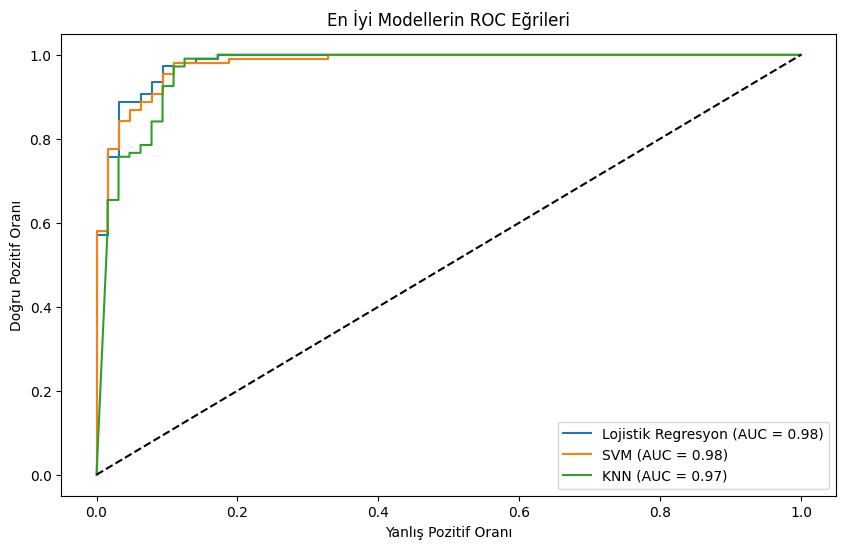

In [15]:
# En iyi modelleri test verisi üzerinde değerlendirelim (isteğe bağlı)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

print("\nEn İyi Modellerin Test Seti Performansı:")
plt.figure(figsize=(10, 6))

# En İyi Lojistik Regresyon Modelinin Değerlendirilmesi
y_pred_logistic_best = best_logistic_model.predict(X_test)
accuracy_logistic_best = accuracy_score(y_test, y_pred_logistic_best)
roc_auc_logistic_best = roc_auc_score(y_test, best_logistic_model.predict_proba(X_test)[:, 1])
fpr_logistic_best, tpr_logistic_best, _ = roc_curve(y_test, best_logistic_model.predict_proba(X_test)[:, 1])

print("\n--- En İyi Lojistik Regresyon ---")
print(f"Doğruluk (Accuracy): {accuracy_logistic_best:.4f}")
print(f"ROC AUC Skoru: {roc_auc_logistic_best:.4f}")
plt.plot(fpr_logistic_best, tpr_logistic_best, label=f'Lojistik Regresyon (AUC = {roc_auc_logistic_best:.2f})')

# En İyi SVM Modelinin Değerlendirilmesi
y_pred_svm_best = best_svm_model.predict(X_test)
accuracy_svm_best = accuracy_score(y_test, y_pred_svm_best)
roc_auc_svm_best = roc_auc_score(y_test, best_svm_model.predict_proba(X_test)[:, 1])
fpr_svm_best, tpr_svm_best, _ = roc_curve(y_test, best_svm_model.predict_proba(X_test)[:, 1])

print("\n--- En İyi Destek Vektör Makineleri (SVM) ---")
print(f"Doğruluk (Accuracy): {accuracy_svm_best:.4f}")
print(f"ROC AUC Skoru: {roc_auc_svm_best:.4f}")
plt.plot(fpr_svm_best, tpr_svm_best, label=f'SVM (AUC = {roc_auc_svm_best:.2f})')

# En İyi KNN Modelinin Değerlendirilmesi
y_pred_knn_best = best_knn_model.predict(X_test)
accuracy_knn_best = accuracy_score(y_test, y_pred_knn_best)
roc_auc_knn_best = roc_auc_score(y_test, best_knn_model.predict_proba(X_test)[:, 1])
fpr_knn_best, tpr_knn_best, _ = roc_curve(y_test, best_knn_model.predict_proba(X_test)[:, 1])

print("\n--- En İyi KNN (KNN) ---")
print(f"Doğruluk (Accuracy): {accuracy_knn_best:.4f}")
print(f"ROC AUC Skoru: {roc_auc_knn_best:.4f}")
plt.plot(fpr_knn_best, tpr_knn_best, label=f'KNN (AUC = {roc_auc_knn_best:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.title('En İyi Modellerin ROC Eğrileri')
plt.legend()
plt.show()